In [1]:
import numpy as np
import pickle as pcl

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

import sys
sys.path.append('/research/astro/highz/Students/Chris/sph2sed')

import sph2sed

If the intrinsic SED grid has not yet been generated, generate a new one and pickle

In [2]:
# sph2sed.intrinsic.fsps.pickle_grid(Nage=60, NZ=15)

Initialise sed object

In [3]:
sp = sph2sed.model.sed()

/research/astro/highz/Students/Chris/sph2sed/sph2sed


load intrinsic SED from pickle

In [4]:
sp.load_grid(name='fsps_neb')

Loading fsps_neb model from: 

/research/astro/highz/Students/Chris/sph2sed/grids/intrinsic/output/fsps_neb.p

Age array not sorted ascendingly. Sorting...



Now have intrinsic `grid`, with arrays for `metallicity`, `age` and `wavelength`

In [5]:
sp.grid.shape

(10, 40, 5994)

In [6]:
sp.metallicity

array([ 0.23622047,  0.64741907,  1.05861767,  1.46981627,  1.88101487,
        2.29221347,  2.70341207,  3.11461067,  3.52580927,  3.93700787])

In [7]:
sp.age

array([ 0.08062241,  0.3515983 ,  0.50642043,  0.61909752,  0.70536205,
        0.77236288,  0.82452142,  0.86504683,  0.8964334 ,  0.92066266,
        0.93931222,  0.95363193,  0.96460525,  0.97300093,  0.97941653,
        0.98431432,  0.9880506 ,  0.9908992 ,  0.99307006,  0.99472386,
        0.99598344,  0.99694258,  0.99767283,  0.99822876,  0.99865193,
        0.99897403,  0.99921919,  0.99940577,  0.99954778,  0.99965585,
        0.9997381 ,  0.99980069,  0.99984832,  0.99988457,  0.99991216,
        0.99993315,  0.99994913,  0.99996129,  0.99997054,  0.99997758])

In [8]:
sp.wavelength

array([  9.10000000e+01,   9.40000000e+01,   9.60000000e+01, ...,
         9.81700000e+07,   9.90800000e+07,   1.00000000e+08])

In [9]:
sp.galaxies

{}

In [10]:
sp.spectra

{}

Load some hydro particle data and insert in to the `sed` object.

In [11]:
# sp.filename = 'data/full_histories_eagle.p'
# sp.load()

# idxs = list(sp.galaxies.keys())[:5]

# temp = [None] * 5

# for i, idx in enumerate(idxs):
    
#     temp[i] = {'Age': sp.galaxies[idx]['StarParticles']['Age'],\
#                 'InitialMass': sp.galaxies[idx]['StarParticles']['InitialMass'],\
#                 'Metallicity': sp.galaxies[idx]['StarParticles']['Metallicity'],\
#                 'sf_gas_mass': sp.galaxies[idx]['sf_gas_mass'],\
#                 'sf_gas_metallicity': sp.galaxies[idx]['sf_gas_metallicity'],\
#                 'stellar_mass': sp.galaxies[idx]['stellar_mass'],\
#                 'sfr_gas': sp.galaxies[idx]['sfr_gas']}

# pcl.dump(temp, open('test_data.p','wb'))

In [12]:
test_data = pcl.load(open('test/test_data.p','rb'))

test_data[0]

{'Age': array([ 0.62700695,  0.34526101,  0.1577947 , ...,  0.38093188,
         0.38104472,  0.54110169], dtype=float32),
 'InitialMass': array([ 1821096.125,  1873845.   ,  1807953.   , ...,  1932109.125,
         1912701.25 ,  1859184.875], dtype=float32),
 'Metallicity': array([ 0.00115223,  0.00476165,  0.        , ...,  0.00618857,
         0.00324413,  0.00827099], dtype=float32),
 'sf_gas_mass': 2.9290022e+09,
 'sf_gas_metallicity': 0.032706067,
 'sfr_gas': 0.94188941,
 'stellar_mass': 1.8201557e+10}

In [13]:
for i in range(len(test_data)):
    
    sp.insert_galaxy(idx=i, p_age=test_data[i]['Age'], 
                     p_initial_mass=test_data[i]['InitialMass'], 
                     p_metallicity=test_data[i]['Metallicity'], 
                     sf_gas_mass=test_data[i]['sf_gas_mass'],
                     sf_gas_metallicity=test_data[i]['sf_gas_metallicity'],
                     sfr_gas=test_data[i]['sfr_gas'],
                     stellar_mass=test_data[i]['stellar_mass'])

sp.galaxies[0]

{'Spectra': {},
 'StarParticles': {'Age': array([ 0.62700695,  0.34526101,  0.1577947 , ...,  0.38093188,
          0.38104472,  0.54110169], dtype=float32),
  'InitialMass': array([ 1821096.125,  1873845.   ,  1807953.   , ...,  1932109.125,
          1912701.25 ,  1859184.875], dtype=float32),
  'Metallicity': array([ 0.00115223,  0.00476165,  0.        , ...,  0.00618857,
          0.00324413,  0.00827099], dtype=float32)},
 'resampled': False,
 'sf_gas_mass': 2.9290022e+09,
 'sf_gas_metallicity': 0.032706067,
 'sfr_gas': 0.94188941,
 'stellar_mass': 1.8201557e+10}

Generate spectra for a single galaxy

In [14]:
idx = list(sp.galaxies.keys())[0]

sp.intrinsic_spectra(idx)                    # intrinsic
sp.dust_screen(idx, metal_dependent=False, key='Screen Spectra')   # galaxy-independent dust screen
sp.dust_screen(idx, metal_dependent=True, key='Z-dependent Screen')    # metallicity-dependent dust screen

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


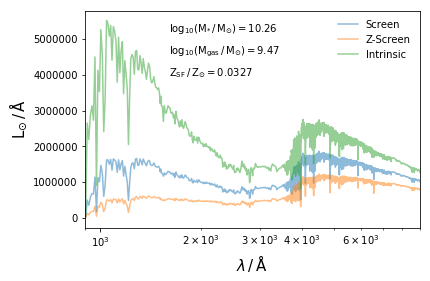

In [15]:
fig, ax = plt.subplots(1,1)

ax.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Screen Spectra'], label='Screen', alpha=0.5)
ax.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Z-dependent Screen'], label='Z-Screen', alpha=0.5)
ax.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Intrinsic Spectra'], label='Intrinsic', alpha=0.5)
ax.legend(frameon=False)

ax.set_xlim(9e2, 9e3)
ax.set_xlabel('$\lambda \,/\, \mathrm{\AA}$', size=15)
ax.set_ylabel('$\mathrm{L_{\odot} \,/\, \AA}$', size=15)

ax.text(0.25,0.9, '$\mathrm{log_{10}(M_{*}\,/\, M_{\odot})} = %.2f$'%\
        np.log10(sp.galaxies[idx]['stellar_mass']), transform=ax.transAxes, size=10)

ax.text(0.25,0.8, '$\mathrm{log_{10}(M_{gas}\,/\, M_{\odot})} = %.2f$'%\
        np.log10(sp.galaxies[idx]['sf_gas_mass']), transform=ax.transAxes, size=10)

ax.text(0.25,0.7, '$\mathrm{Z_{SF}\,/\, Z_{\odot}} = %.4f$'%\
        sp.galaxies[idx]['sf_gas_metallicity'], transform=ax.transAxes, size=10)

# fig.savefig('plots/example_spectra_B.png', dpi=200, bbox_inches='tight')

In [16]:
sp.spectra

{'Intrinsic Spectra': {'lambda': array([  9.10000000e+01,   9.40000000e+01,   9.60000000e+01, ...,
           9.81700000e+07,   9.90800000e+07,   1.00000000e+08]),
  'scaler': None,
  'units': 'Lsol / AA'},
 'Screen Spectra': {'lambda': array([  9.10000000e+01,   9.40000000e+01,   9.60000000e+01, ...,
           9.81700000e+07,   9.90800000e+07,   1.00000000e+08]),
  'scaler': None,
  'units': 'Lsol / AA'},
 'Z-dependent Screen': {'lambda': array([  9.10000000e+01,   9.40000000e+01,   9.60000000e+01, ...,
           9.81700000e+07,   9.90800000e+07,   1.00000000e+08]),
  'scaler': None,
  'units': 'Lsol / AA'}}

Resample recent star formation

In [17]:
sp.resample_recent_sf(idx)

sp.intrinsic_spectra(idx, resampled=True)                    # intrinsic
sp.dust_screen(idx, metal_dependent=False, resampled=True, key='Screen Spectra')      # galaxy-independent dust screen
sp.dust_screen(idx, metal_dependent=True, resampled=True, key='Z-dependent Screen')   # metallicity-dependent dust screen

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


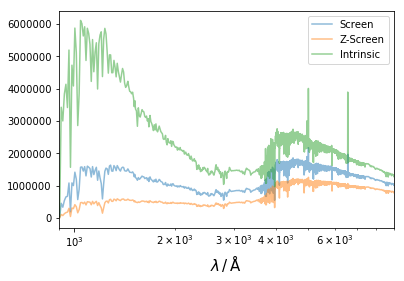

In [18]:
plt.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Screen Spectra'], label='Screen', alpha=0.5)
plt.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Z-dependent Screen'], label='Z-Screen', alpha=0.5)
plt.semilogx(sp.wavelength, sp.galaxies[idx]['Spectra']['Intrinsic Spectra'], label='Intrinsic', alpha=0.5)
plt.legend()

plt.xlim(9e2, 9e3)
plt.xlabel('$\lambda \,/\, \mathrm{\AA}$', size=15)

Apply to all galaxies

In [19]:
sp.all_galaxies(sp.resample_recent_sf)

sp.all_galaxies(sp.intrinsic_spectra, resampled=True)
sp.all_galaxies(sp.dust_screen, resampled=True, key='Screen Spectra')
sp.all_galaxies(sp.dust_screen, resampled=True, metal_dependent=True, key='Z-dependent Screen');

(912.0, 9000.0)

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


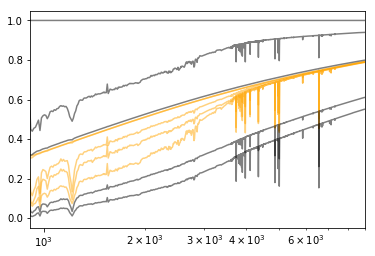

In [20]:
plt.semilogx(sp.wavelength, np.array([value['Spectra']['Screen Spectra'] for key, value in sp.galaxies.items()]).T /\
        np.array([value['Spectra']['Intrinsic Spectra'] for key, value in sp.galaxies.items()]).T, 
             color='orange', alpha=0.5);

plt.semilogx(sp.wavelength, np.array([value['Spectra']['Z-dependent Screen'] for key, value in sp.galaxies.items()]).T /\
        np.array([value['Spectra']['Intrinsic Spectra'] for key, value in sp.galaxies.items()]).T, 
             color='black', alpha=0.5);

plt.xlim(9.12e2, 9e3)

(900.0, 9000.0)

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


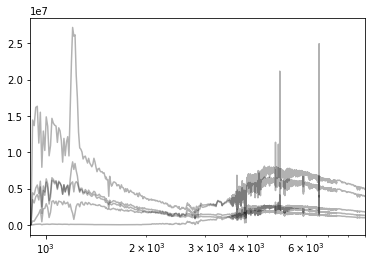

In [21]:
plt.semilogx(sp.wavelength, np.array([value['Spectra']['Intrinsic Spectra'] for key, value in sp.galaxies.items()]).T, 
         alpha=0.3, c='black');

plt.xlim(9e2, 9e3)

(900.0, 9000.0)

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


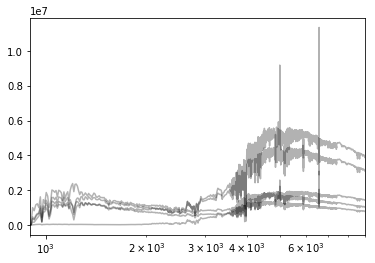

In [22]:
plt.semilogx(sp.wavelength, np.array([value['Spectra']['Screen Spectra'] for key, value in sp.galaxies.items()]).T, 
         alpha=0.3, c='black');

plt.xlim(9e2, 9e3)

(900.0, 9000.0)

/home/c/cl/cl478/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


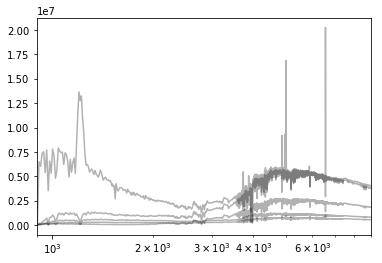

In [23]:
plt.semilogx(sp.wavelength, np.array([value['Spectra']['Z-dependent Screen'] for key, value in sp.galaxies.items()]).T, 
         alpha=0.3, c='black');

plt.xlim(9e2, 9e3)